In [287]:
import importlib
import SpotifyAPIClient
import pprint
import csv
import os
import random
importlib.reload(SpotifyAPIClient)
from SpotifyAPIClient import SpotifyAPI

import mysklearn.myutils
importlib.reload(mysklearn.myutils)
import mysklearn.myutils as myutils

import mysklearn.plot_utils
importlib.reload(mysklearn.plot_utils)
import mysklearn.plot_utils as plot_utils

import mysklearn.mypytable
importlib.reload(mysklearn.mypytable)
from mysklearn.mypytable import MyPyTable 

import mysklearn.myevaluation
importlib.reload(mysklearn.myevaluation)
import mysklearn.myevaluation as myevaluation

import mysklearn.myclassifiers
importlib.reload(mysklearn.myclassifiers)
from mysklearn.myclassifiers import MyKNeighborsClassifier, MyNaiveBayesClassifier, MyDecisionTreeClassifier, MyRandomForestClassifier

fname = os.path.join("data", 'track-audio-features-all.txt')
track_data = MyPyTable().load_from_file(fname)


client_id = 'd7a2e6f4a8434550baa5eda073f0a6a3'
client_secret = 'def46d47ba584e378b7667645666a468'
playlist_id = '7L736vCRhBe5EapwwkutUl'

In [288]:
# spotify = SpotifyAPI(client_id, client_secret)
# response = spotify.get_playlist(playlist_id)


[[-2.634, -4.969, -3.432, -3.778, -4.672, -5.385, -4.788, -2.419, -3.562, -4.552, -4.918, -4.675, -4.451, -4.446, -4.603, -4.322, -5.289, -5.466, -5.053, -4.329, -4.477, -3.785, -3.781, -3.983, -2.929, -4.754, -5.06, -4.121, -5.029, -4.046, -2.921, -2.878, -3.503, -3.66, -4.104, -4.364, -4.203, -4.564, -3.318, -4.607, -2.996, -4.952, -4.744, -4.358, -5.283, -4.451, -3.613, -2.325, -4.154, -5.547, -5.48, -4.504, -3.759, -5.59, -3.87, -3.933, -3.374, -5.445, -4.792, -4.629, -3.249, -4.388, -2.868, -3.584, -3.815, -4.437, -5.265, -4.859, -4.872, -4.481, -5.377, -4.75, -3.884, -3.004, -3.061, -4.449, -3.962, -5.453, -2.853, -5.299, -5.003, -3.284, -4.661, -4.761, -5.541, -3.721, -4.389, -4.159, -5.154, -5.245, -4.578, -1.818, -4.855, -3.613, -4.617, -4.474, -4.285, -5.025, -4.275, -4.167, -5.599, -3.48, -4.546, -5.337, -4.711, -4.137, -3.24, -4.124, -5.371, -3.109, -5.456, -4.346, -3.669, -2.787, -5.335, -3.674, -5.053, -5.039, -3.419, -4.081, -4.618, -4.373, -3.785, -4.999, -4.447, -2.097

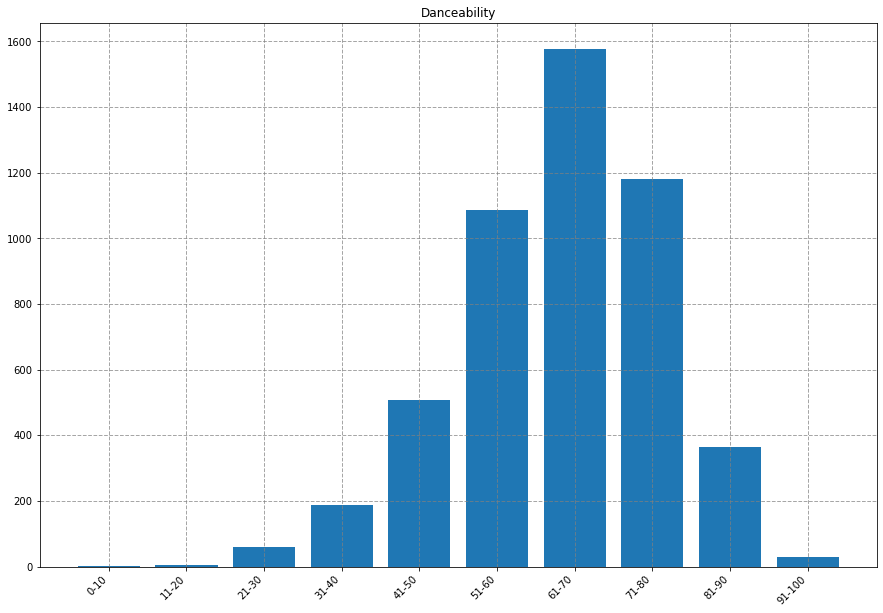

In [289]:
danceability = myutils.format_num(track_data.get_column('danceability'))
energy = myutils.format_num(track_data.get_column('energy'))
loudness = track_data.get_column('loudness')
speechiness = myutils.format_num(track_data.get_column('speechiness'))
tempo = myutils.convert_tempo(track_data.get_column('tempo'))
valence = myutils.format_num(track_data.get_column('valence'))

dance_bins = myutils.bin_vals(danceability)
energy_bins = myutils.bin_vals(energy)
loudness_bins = myutils.bin_loudness(loudness)
valence_bins = myutils.bin_vals(valence)

dance_bin_count = [[len(dance_bins[0])],[len(dance_bins[1])],[len(dance_bins[2])],[len(dance_bins[3])],[len(dance_bins[4])],[len(dance_bins[5])],[len(dance_bins[6])],[len(dance_bins[7])],[len(dance_bins[8])],[len(dance_bins[9])]]


x_vals = ['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100']
y_vals = []
for i in range(len(dance_bin_count)):
    y_vals.append(dance_bin_count[i][0])

plot_utils.frequency_chart(x_vals, y_vals,  "Danceability", "", "")



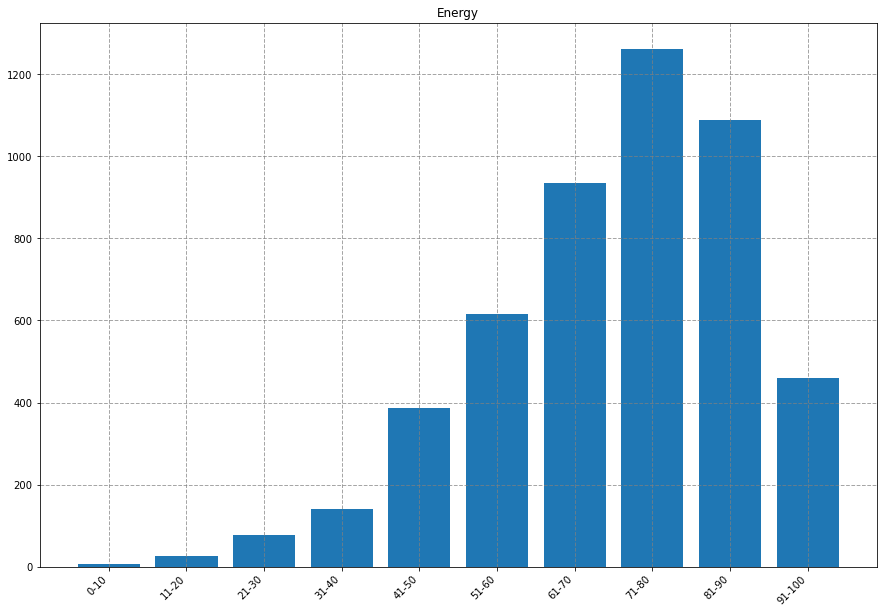

In [290]:
energy_bin_count = [[len(energy_bins[0])],[len(energy_bins[1])],[len(energy_bins[2])],[len(energy_bins[3])],[len(energy_bins[4])],[len(energy_bins[5])],[len(energy_bins[6])],[len(energy_bins[7])],[len(energy_bins[8])],[len(energy_bins[9])]]


x_vals = ['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100']
y_vals = []
for i in range(len(energy_bin_count)):
    y_vals.append(energy_bin_count[i][0])

plot_utils.frequency_chart(x_vals, y_vals,  "Energy", "", "")

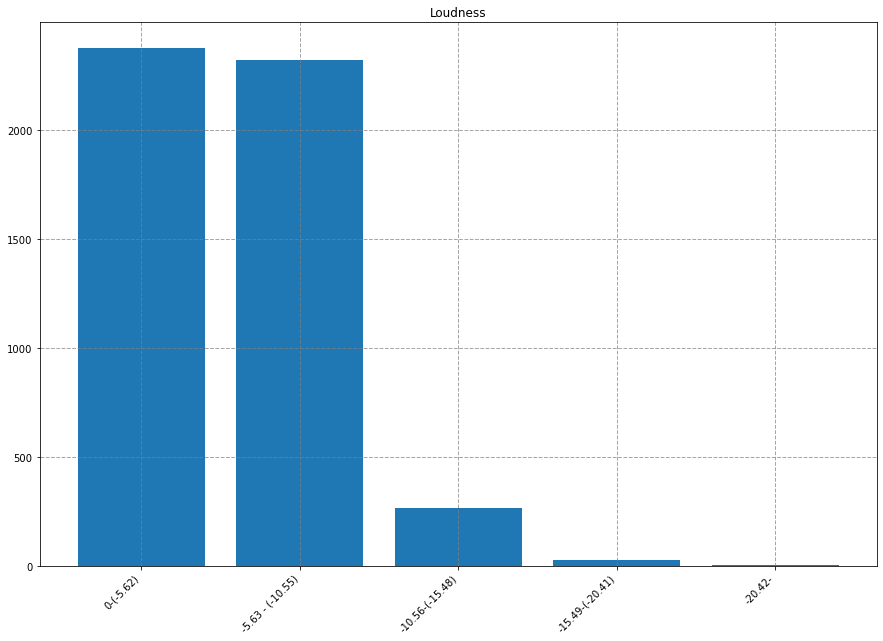

In [291]:
loudness_bin_count = [[len(loudness_bins[0])],[len(loudness_bins[1])],[len(loudness_bins[2])],[len(loudness_bins[3])],[len(loudness_bins[4])]]

x_vals = ['0-(-5.62)','-5.63 - (-10.55)','-10.56-(-15.48)','-15.49-(-20.41)','-20.42-']
y_vals = []
for i in range(len(loudness_bin_count)):
    y_vals.append(loudness_bin_count[i][0])

plot_utils.frequency_chart(x_vals, y_vals,  "Loudness", "", "")

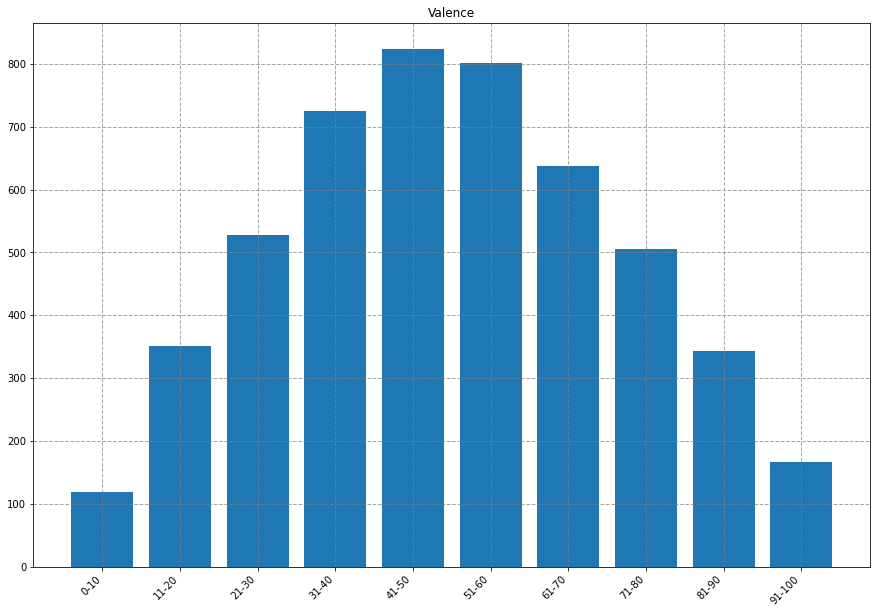

In [292]:
valence_bin_count = [[len(valence_bins[0])],[len(valence_bins[1])],[len(valence_bins[2])],[len(valence_bins[3])],[len(valence_bins[4])],[len(valence_bins[5])],[len(valence_bins[6])],[len(valence_bins[7])],[len(valence_bins[8])],[len(valence_bins[9])]]

x_vals = ['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100']
y_vals = []
for i in range(len(valence_bin_count)):
    y_vals.append(valence_bin_count[i][0])

plot_utils.frequency_chart(x_vals, y_vals,  "Valence", "", "")

In [293]:
danceability = myutils.format_num(track_data.get_column('danceability'))
energy = myutils.format_num(track_data.get_column('energy'))
loudness = myutils.convert_loudness(track_data.get_column('loudness'))
speechiness = myutils.format_num(track_data.get_column('speechiness'))
tempo = myutils.convert_tempo(track_data.get_column('tempo'))
valence = myutils.format_num(track_data.get_column('valence'))

x_vals = [[danceability[i], energy[i], loudness[i], speechiness[i], tempo[i], valence[i]] for i in range(len(danceability))]
y_vals = myutils.convert_to_rank(track_data.get_column("track_popularity"))

print(min(myutils.get_unique(speechiness)))
print(max(myutils.get_unique(speechiness)))

print('Stratified 10-Fold Cross Validation\n')
strat_train_folds, strat_test_folds = myevaluation.stratified_kfold_cross_validation(x_vals, y_vals, 10)
strat_xtrain, strat_ytrain, strat_xtest, strat_ytest = myutils.get_from_folds(x_vals, y_vals, strat_train_folds, strat_test_folds)

myNb = MyNaiveBayesClassifier()
myNb.fit(strat_xtrain, strat_ytrain)

predicted = myNb.predict(strat_xtest)
accuracy = myutils.get_accuracy(strat_ytest, predicted)
print('Nive Bayes:  Accuracy =', round(accuracy * 100, 3), 'Error Rate = ', round((1-accuracy) * 100, 3))

2.28
86.9
Stratified 10-Fold Cross Validation

Nive Bayes:  Accuracy = 83.94 Error Rate =  16.06


In [294]:
danceability = myutils.format_num(track_data.get_column('danceability'))
energy = myutils.format_num(track_data.get_column('energy'))
loudness = myutils.format_num(track_data.get_column('loudness'))
speechiness = myutils.format_num(track_data.get_column('speechiness'))
tempo = myutils.convert_tempo(track_data.get_column('tempo'))
valence = myutils.format_num(track_data.get_column('valence'))

x_vals = [[danceability[i], energy[i], loudness[i], speechiness[i], tempo[i], valence[i]] for i in range(len(danceability))]
y_vals = myutils.convert_to_rank(track_data.get_column("track_popularity"))

strat_train_folds2, strat_test_folds2 = myevaluation.stratified_kfold_cross_validation(x_vals, y_vals, 10)
strat_xtrain2, strat_ytrain2, strat_xtest2, strat_ytest2 = myutils.get_from_folds(x_vals, y_vals, strat_train_folds2, strat_test_folds2)

my_tree = MyDecisionTreeClassifier()
my_tree.fit(strat_xtrain2, strat_ytrain2)

predicted2 = my_tree.predict(strat_xtest2)
accuracy2 = myutils.get_accuracy(strat_ytest2, predicted2)
print('My Decision Tree: Accuracy =', round(accuracy2 * 100, 3), 'Error Rate = ', round((1-accuracy2) * 100, 3))

My Decision Tree: Accuracy = 79.96 Error Rate =  20.04
